In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
num_trajs = 2

traj_list = []
for traj in range(1, num_trajs+1):
    traj_list.append(f'TRAJ{traj}')

traj_list

['TRAJ1', 'TRAJ2']

In [15]:
def read_positions(traj):
    return pd.read_csv(f'tully2/mom30/{traj}/positions.dat', 
                       sep='\s+', 
                       skiprows=1,
                       names=['time', 'x', 'y', 'z'])

def read_energies(traj):
    return pd.read_csv(f'tully2/mom30/{traj}/energies.dat',
                       sep='\s+',
                       skiprows=1,
                       names=['time', 'tot', 'kin', 'current', 'S0', 'S1', 'state'])

In [16]:
positions = {}
for traj in traj_list:
    positions[traj] = read_positions(traj)

energies = {}
for traj in traj_list:
    energies[traj] = read_energies(traj)

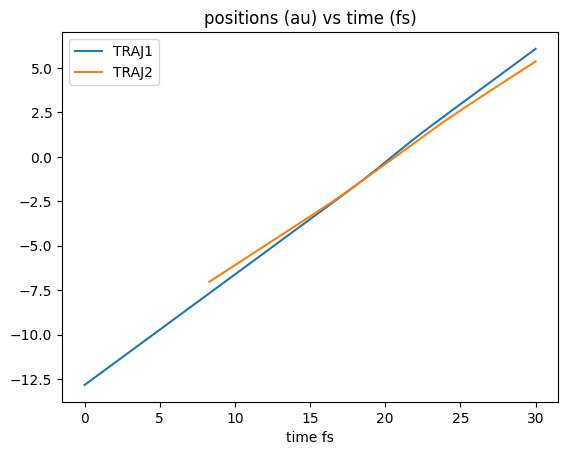

In [17]:
for traj in traj_list:
    plt.plot(positions[traj].time, positions[traj].x, label=traj)

plt.title('positions (au) vs time (fs)')
plt.xlabel('time fs')
plt.legend()

In [18]:
energies['TRAJ1']

,time,tot,kin,current,S0,S1,state
0,0.0,0.225633,0.225633,-1.197390e-11,-1.197390e-11,0.050000,0
1,0.1,0.225633,0.225633,-1.448970e-11,-1.448970e-11,0.050000,0
2,0.2,0.225633,0.225633,-1.751790e-11,-1.751790e-11,0.050000,0
3,0.3,0.225633,0.225633,-2.115940e-11,-2.115940e-11,0.050000,0
4,0.4,0.225633,0.225633,-2.553430e-11,-2.553430e-11,0.050000,0
...,...,...,...,...,...,...,...
296,29.6,0.225633,0.225710,-7.705290e-05,-7.705290e-05,0.050070,0
297,29.7,0.225633,0.225703,-7.062350e-05,-7.062350e-05,0.050064,0
298,29.8,0.225633,0.225697,-6.467040e-05,-6.467040e-05,0.050060,0
299,29.9,0.225633,0.225692,-5.916410e-05,-5.916410e-05,0.050055,0


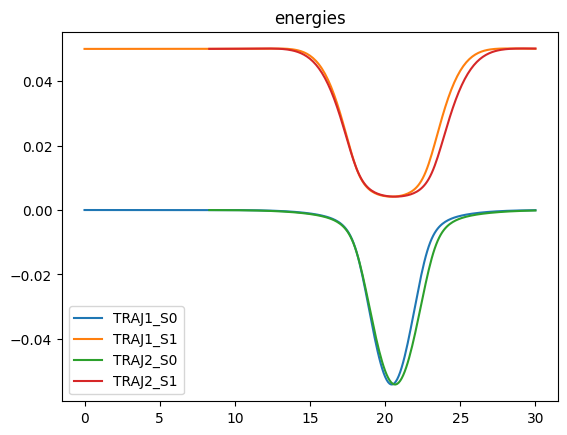

In [19]:
for traj in traj_list:
    plt.plot(energies[traj].time, energies[traj].S0, label=f'{traj}_S0')
    plt.plot(energies[traj].time, energies[traj].S1, label=f'{traj}_S1')

plt.title('energies')
plt.legend()

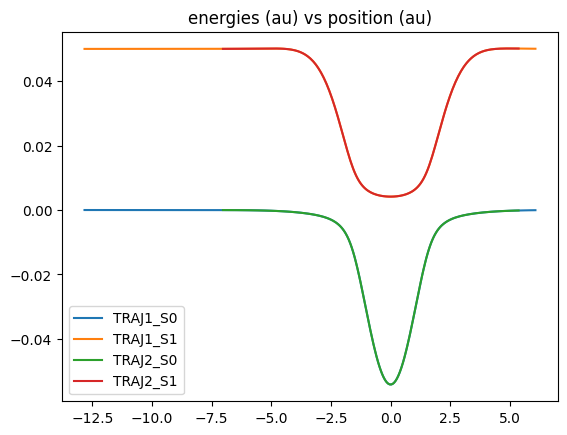

In [21]:
for traj in traj_list:
    plt.plot(positions[traj].x, energies[traj].S0, label=f'{traj}_S0')
    plt.plot(positions[traj].x, energies[traj].S1, label=f'{traj}_S1')

plt.title('energies (au) vs position (au)')
plt.legend()